# Solutions Lab  | Customer Analysis Round 3

For the Lab Data Transformation solution, see below

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/simonefischer/Ironhack/Week_1/Day_4/Afternoon/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')


cols = []
for colname in data.columns:
    cols.append(colname.lower())

data.columns = cols

for colname in data:
     data.columns = data.columns.str.replace(" ", "_")

display(data.head())

data.isnull().sum() #no missing values


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [4]:
#Show DataFrame info

data.head(50)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [5]:
#Describe DataFrame

data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Total count of each response:
response
No     7826
Yes    1308
Name: count, dtype: int64


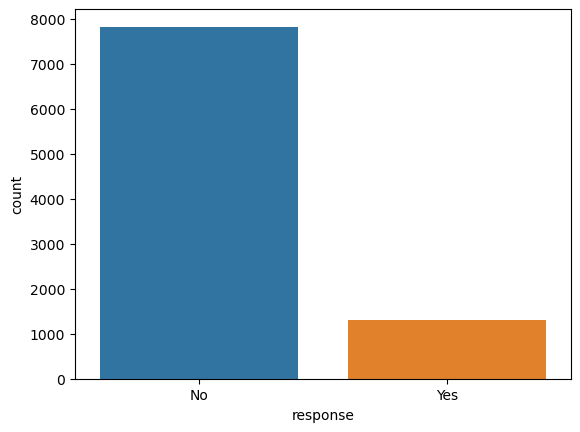

9134
9134


In [6]:
total_count_response = data['response'].value_counts()

# Display the total counts
print("Total count of each response:")
print(total_count_response)

#Show a plot of the total number of responses
fig, ax = plt.subplots()
sns.countplot(data=data, x='response', ax = ax)
plt.show()

#the total amount of responses 

total_count = ((data["response"] == "Yes") + (data["response"] == "No")).sum()

print(total_count) #9134 the number of responses in total = len(data)
print(len(data))

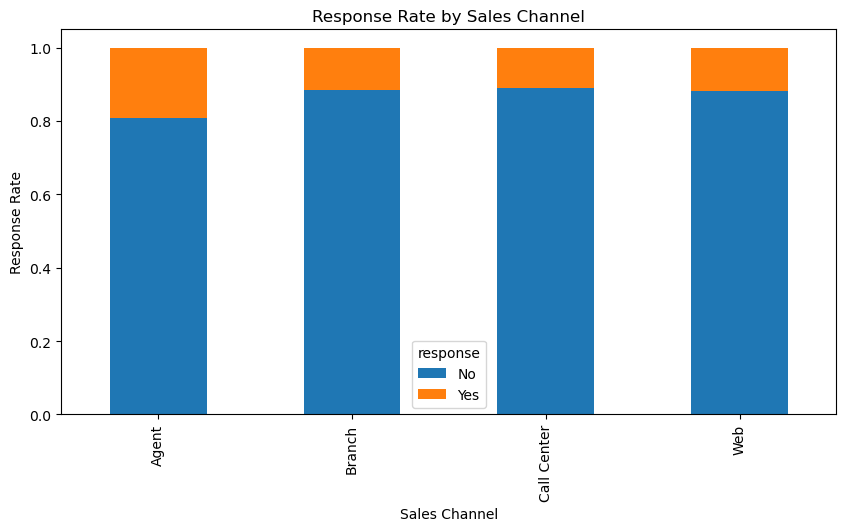

In [7]:
#Show a plot of the response rate by the sales channel

response_rate_by_channel = data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(figsize=(10, 5))
response_rate_by_channel.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Response Rate')
ax.set_xlabel('Sales Channel')
plt.title('Response Rate by Sales Channel')
plt.show()

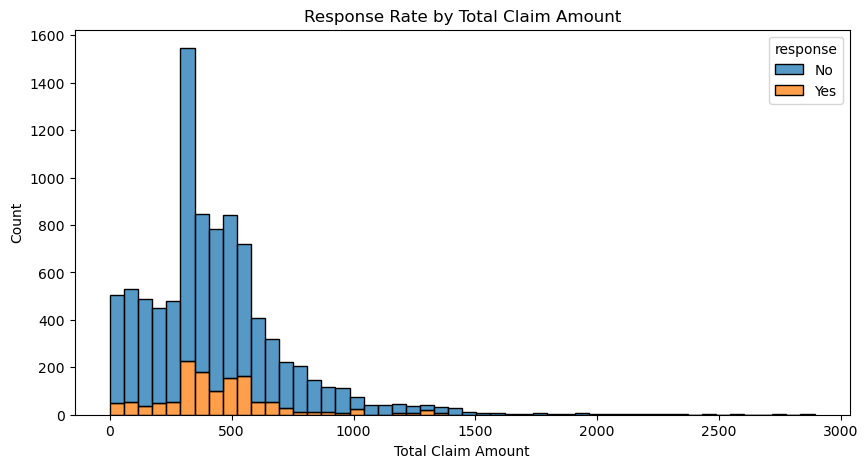

In [8]:
#Show a plot of the response rate by the total claim amount

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='total_claim_amount', bins=50, hue='response', multiple='stack', ax=ax)

ax.set_ylabel('Count')
ax.set_xlabel('Total Claim Amount')
plt.title('Response Rate by Total Claim Amount')

plt.show()

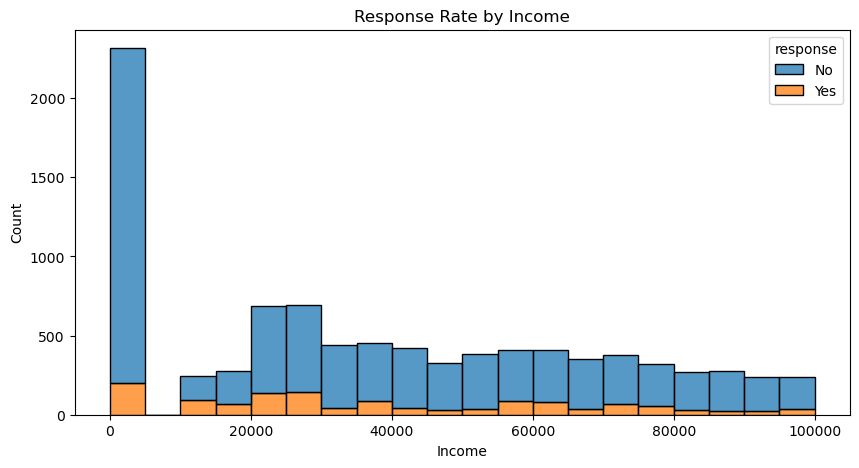

In [9]:
#Show a plot of the response rate by income

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='income', bins=20, hue='response', multiple='stack', ax=ax)

ax.set_ylabel('Count')
ax.set_xlabel('Income')
plt.title('Response Rate by Income')

plt.show()

# Solutions Lab | Data Transformations

For the "Lab Model generation and validation" solution, see below

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [10]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [14]:
numerical = data.select_dtypes(include=[np.number])

categoricals = data.select_dtypes(include=[object])

print(list(categoricals))



['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [40]:
#sns.pairplot(numerical)
#plt.show()

In [41]:
def distribution_plot(df: pd.DataFrame, colname: object) -> None:

        
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].hist(df[colname], bins=50)
    sns.histplot(df[colname], bins=50, ax=ax[1])
    plt.show()

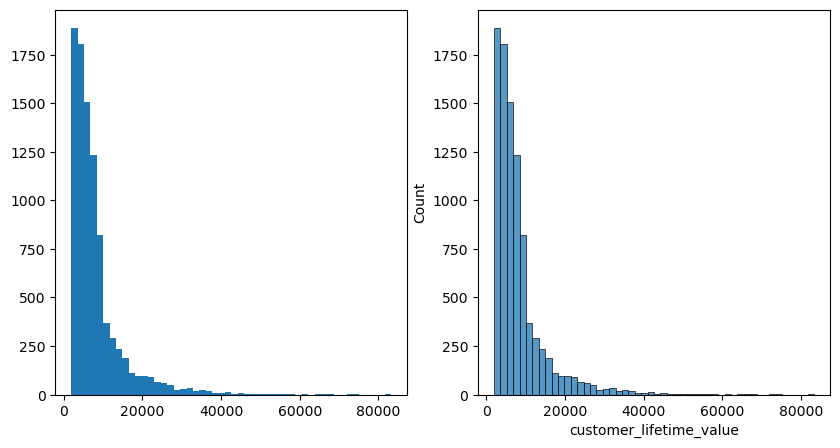

In [42]:
distribution_plot(data, "customer_lifetime_value")

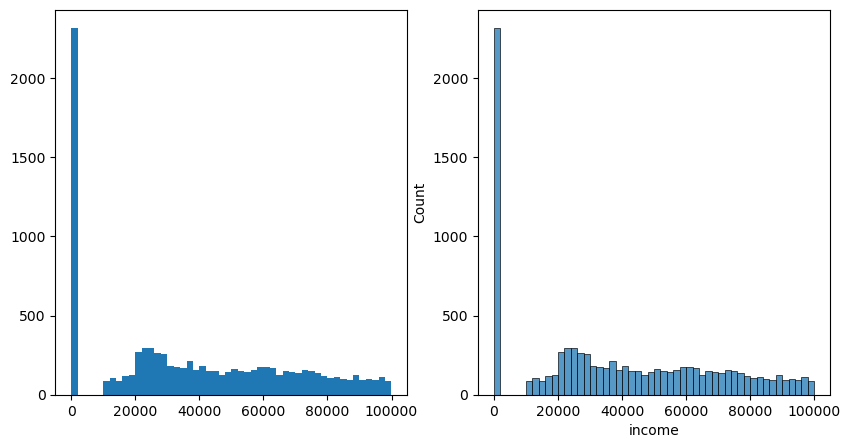

In [43]:
distribution_plot(data, "income")

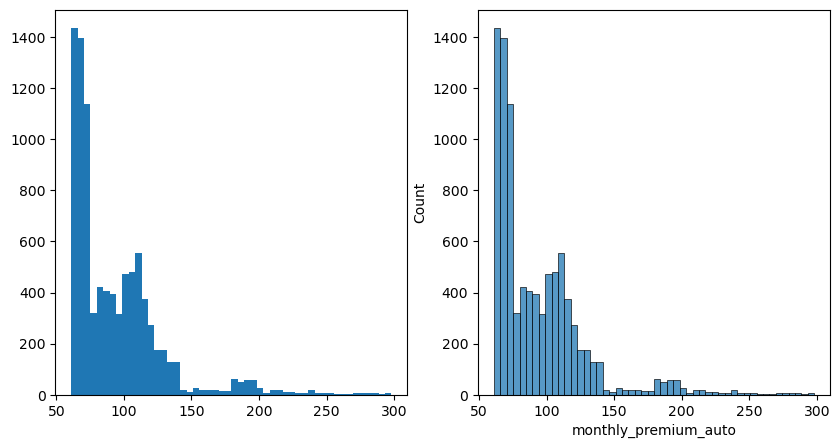

In [44]:
distribution_plot(data, "monthly_premium_auto")

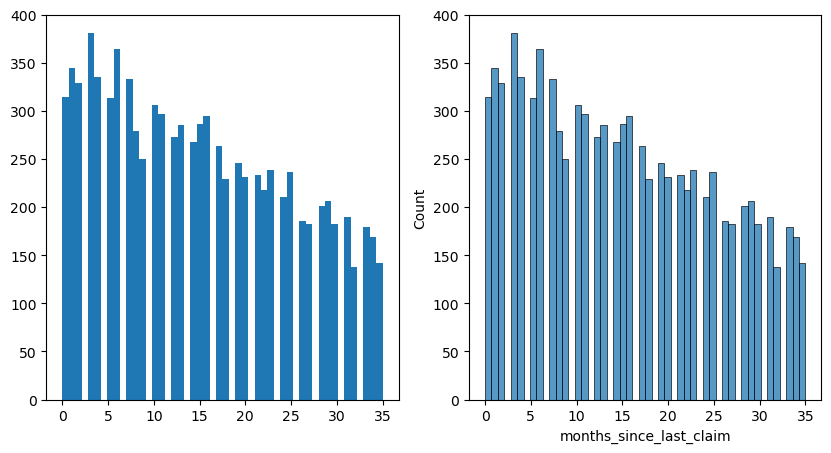

In [45]:
distribution_plot(data, "months_since_last_claim")

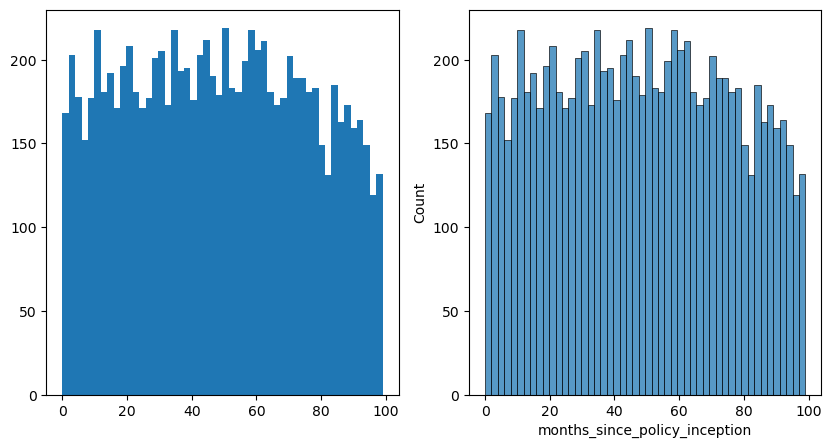

In [46]:
distribution_plot(data, "months_since_policy_inception")

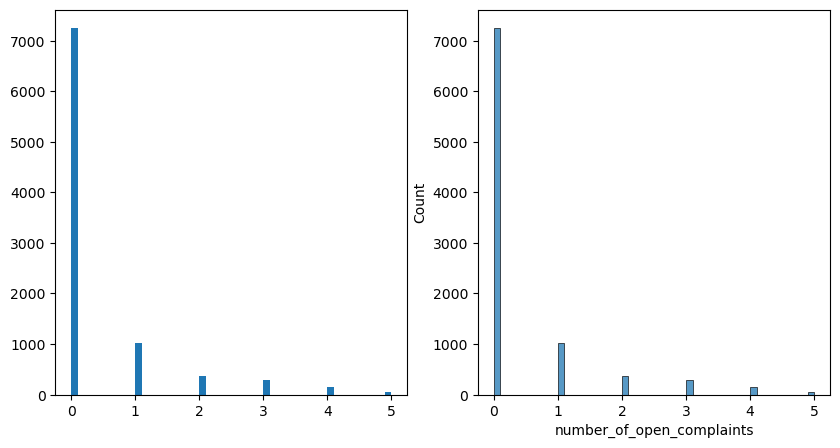

In [47]:
distribution_plot(data, "number_of_open_complaints")

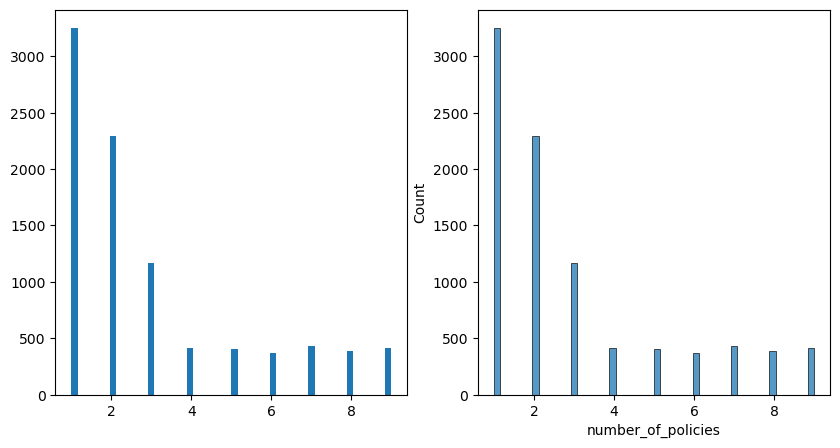

In [48]:
distribution_plot(data, "number_of_policies")

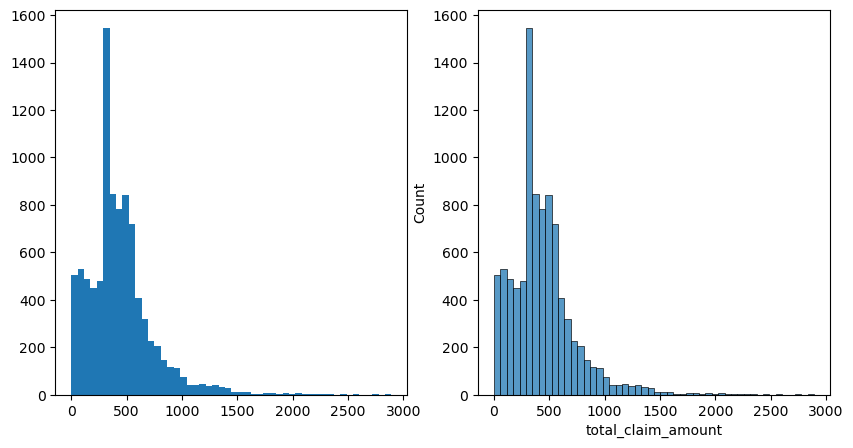

In [49]:
distribution_plot(data, "total_claim_amount")

In [50]:
numerical.skew()

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        2.783263
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

customer_lifetime_value          3.032280 -> the data is significantly right-skewed, the right tail is longer than the left
income                           0.286887 -> the distribution is considered approximately symmetric
monthly_premium_auto             2.123546 -> the data is right-skewed
months_since_last_claim          0.278586 -> the distribution is considered approximately symmetric
months_since_policy_inception    0.040165 -> the distribution is considered approximately symmetric
number_of_open_complaints        2.783263 -> the data is right-skewed
number_of_policies               1.253333 -> the data is in the [-2,2] range, but still right-skewed
total_claim_amount               1.714966 -> the data is in the [-2,2] range, but still right-skewed

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [51]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


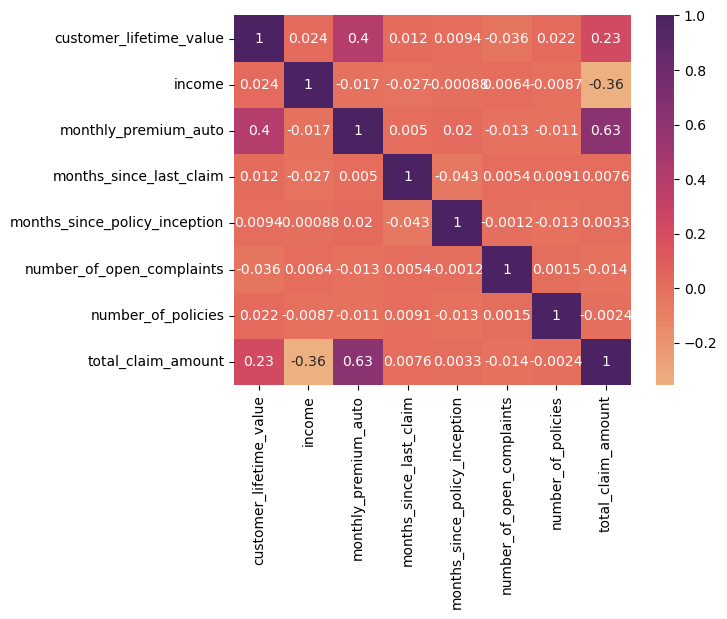

In [52]:
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap)
plt.show()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(df: pd.DataFrame, columns: list):

    # Create a copy of the DataFrame to avoid modifying the original
    X = df.loc[:, columns].copy()
    
    # Add a constant to the DataFrame
    X = add_constant(X)

    # Create DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable'] != 'const'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

# Columns to consider
selected_columns = list(numerical.columns)

# Compute VIF
vif_df = compute_vif(numerical, selected_columns)
display(vif_df)


,Variable,VIF
0,total_claim_amount,2.077546
1,monthly_premium_auto,2.020101
2,income,1.248748
3,customer_lifetime_value,1.190707
4,months_since_last_claim,1.002881
5,months_since_policy_inception,1.002642
6,number_of_open_complaints,1.001459
7,number_of_policies,1.001304


If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

In [54]:
#it seems like no pair of columns is correlated greater than 0.9

# Solution Lab | Model generation, and validation

In [56]:
correlations_matrix["total_claim_amount"]

customer_lifetime_value          0.226451
income                          -0.355254
monthly_premium_auto             0.632017
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_open_complaints       -0.014241
number_of_policies              -0.002354
total_claim_amount               1.000000
Name: total_claim_amount, dtype: float64

Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity (see the previous lab)

0.0 to 0.2: Very weak correlation
0.2 to 0.4: Weak correlation
0.4 to 0.6: Moderate correlation
0.6 to 0.8: Strong correlation
0.8 to 1.0: Very strong correlation

In [57]:
##it seems like only monthly_premium_auto has a strong correlation with total_claim_amount 
##VIF monthly_premium_auto: 2.020101

Remove outliers

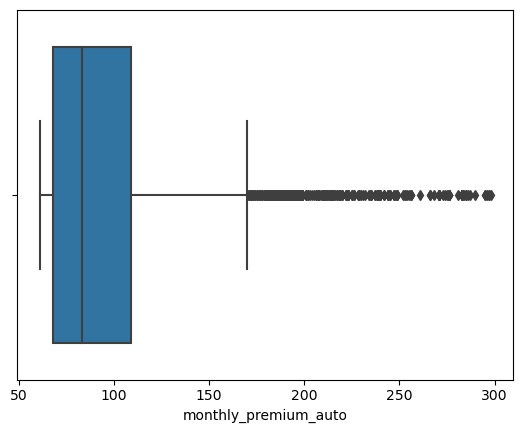

In [59]:
sns.boxplot(x=data['monthly_premium_auto'])
plt.show()

/Users/simonefischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


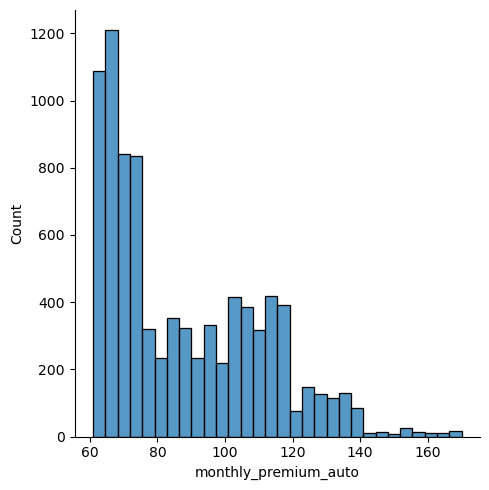

In [64]:
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25) ## IQR = Q3 - Q1
upper_wisker = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr ## upper_wisker = Q3 + 1.5*iqr
lower_wisker = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr ## lower_wisker = Q1 - 1.5*iqr

data = data[(data['monthly_premium_auto']>lower_wisker) & (data['monthly_premium_auto']<upper_wisker)]
sns.displot(x=data["monthly_premium_auto"])
plt.show()

In [15]:
y = data['total_claim_amount']
X = data[["monthly_premium_auto", 'customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']] # This must be a Pandas DataFrame

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = object)

X_test_num  = X_test_df.select_dtypes(include = np.number)
X_test_cat  = X_test_df.select_dtypes(['object'])

from sklearn.preprocessing import StandardScaler

#X_train_num is your DataFrame with numerical columns
scaler = StandardScaler()
# Fitting the scaler on the training set
scaler.fit(X_train_num)

StandardScaler()

In [35]:
#display(X)

In [26]:
import os
import pickle

path = "transformers/"

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "filename.pkl"  # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path + filename, "wb") as file:
    pickle.dump(scaler, file)  # Replace "variable" with the name of the variable that contains your transformer

    
X_train_num_scaled = scaler.transform(X_train_num) 
X_test_num_scaled  = scaler.transform(X_test_df.select_dtypes(include=np.number))

In [27]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_num.columns)
X_test_num_scaled_df  = pd.DataFrame(X_test_num_scaled,  columns=X_num.columns)

X_train_num_scaled_df.head()

,monthly_premium_auto
0,-0.939028
1,-0.419953
2,-0.564141
3,-0.852516
4,-0.794841


In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(X_train_cat)

path = "./"
filename = "one_hot_encoder.pkl"
with open(path + filename, "wb") as file:
    pickle.dump(encoder, file)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out())
X_test_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out())
X_train_encoded_df.head()

/Users/simonefischer/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,customer_AB21519,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
X_train_treated_df = pd.concat([X_train_num_scaled_df, X_train_encoded_df], axis=1)
X_test_treated_df  = pd.concat([X_test_num_scaled_df, X_test_encoded_df], axis=1)
X_train_treated_df

,monthly_premium_auto,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.939028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.419953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.564141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.852516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.794841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,-0.939028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7303,-0.592978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7304,1.021922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7305,1.310297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
X_train_treated_df.describe()

,monthly_premium_auto,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
count,7.307000e+03,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,...,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000
mean,1.400276e-16,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,...,0.282058,0.195018,0.144382,0.019707,0.020665,0.198166,0.054195,0.203367,0.706720,0.190092
std,1.000068e+00,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,...,0.450032,0.396242,0.351501,0.139001,0.142270,0.398645,0.226417,0.402531,0.455297,0.392400
min,-9.390284e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.371659e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.046033e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.451718e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.895460e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_treated_df)

path = "./"
filename = "min_max_scaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

X_train_scaled = scaler.transform(X_train_treated_df)
X_test_scaled  = scaler.transform(X_test_treated_df)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_treated_df.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_treated_df.columns)
X_train_scaled_df.head()

,monthly_premium_auto,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.075949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.054852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.012658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.021097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
X_train_scaled_df.describe()

,monthly_premium_auto,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
count,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,...,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000
mean,0.137396,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,...,0.282058,0.195018,0.144382,0.019707,0.020665,0.198166,0.054195,0.203367,0.706720,0.190092
std,0.146327,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,0.011699,...,0.450032,0.396242,0.351501,0.139001,0.142270,0.398645,0.226417,0.402531,0.455297,0.392400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.202532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [53]:
path = "models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_reg_model.pkl"  # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path + filename, "wb") as file:
    pickle.dump(linear_reg_model, file)  # Replace "variable" with the name of the variable that contains your transformer


The new directory is created!


In [54]:
y_train_pred = linear_reg_model.predict(X_train_scaled_df)
y_test_pred  = linear_reg_model.predict(X_test_scaled_df)
print("The first predictions on the TRAIN set are: ",y_train_pred[:5])
print("The first predictions on the TEST set are: ",y_test_pred[:5])

The first predictions on the TRAIN set are:  [223.305224 568.8      355.2      272.649844 391.970334]
The first predictions on the TEST set are:  [248.99589619 445.03939967 434.55736462 291.56919629 408.90978955]


In [55]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,223.305224,223.305224
1,Train,568.800000,568.800000
2,Train,355.200000,355.200000
3,Train,272.649844,272.649844
4,Train,391.970334,391.970334


In [57]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,223.305224,223.305224,3.524292e-12
1,Train,568.800000,568.800000,5.456968e-12
2,Train,355.200000,355.200000,-5.627498e-12
3,Train,272.649844,272.649844,-1.875833e-12
4,Train,391.970334,391.970334,-2.387424e-12


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Calculate error metrics for training and testing sets and return a pd.DataFrame

    Input:
    y_real_train: List 
    y_real_test: List
    y_pred_train: List
    y_pred_test: List

    Returns:
    pd.DataFrame: DataFrame containing error metrics (MAE, MSE, RMSE, R2) for the training and testing sets
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)
                                
    #Mean Squared Error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root Mean Squared Error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)
    
    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ["MAE", "MSE", "RMSE", "R2"], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [61]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,0.0,104.24
1,MSE,0.0,23011.59
2,RMSE,0.0,151.70
3,R2,1.0,0.71
